In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay

# KNN Classifier

1.Load iris + split
2.Define the pipleine
3.Fit the model
4.Score on the test set

In [27]:
# data = load_iris()
# df = pd.DataFrame(data=data.data, columns=data.feature_names)
# df.head()

In [33]:
selected_columns = ["sepal length (cm)", "sepal width (cm)"]
iris = load_iris(as_frame=True)

X = iris.data[selected_columns]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [34]:
X.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [30]:
type(iris)

sklearn.utils._bunch.Bunch

In [21]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9736842105263158

In [35]:
params = ("uniform","distance")

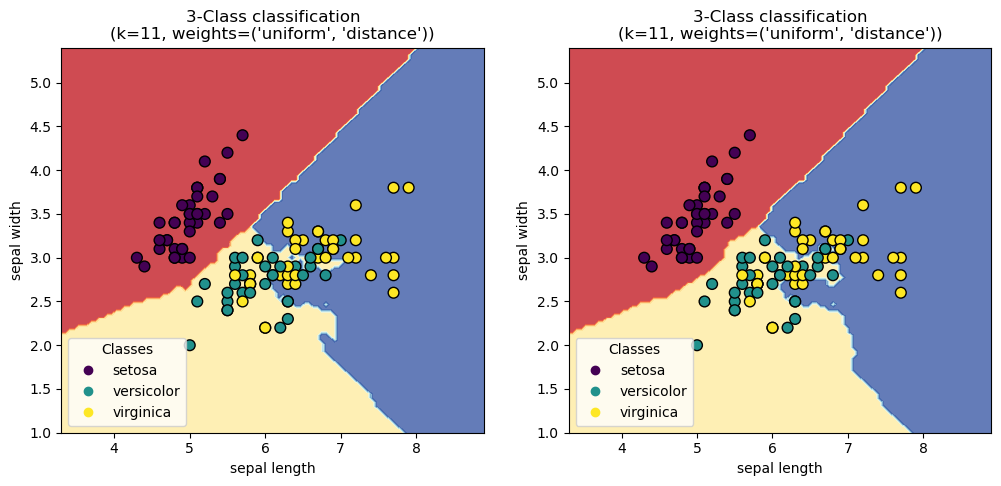

In [36]:
_, axes = plt.subplots(ncols=len(params), figsize=(12, 5))
for ax, param in zip(axes, params):
    model.set_params(knn__weights=param).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        model, X_train, cmap=plt.cm.RdYlBu, alpha=0.8, ax=ax, response_method="predict"
    )
    scatter = disp.ax_.scatter(X_train[selected_columns[0]], X_train[selected_columns[1]], c=y_train, s=60, edgecolor="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(f"3-Class classification\n(k={model[-1].n_neighbors}, weights={params!r})")
    ax.set_xlabel("sepal length")
    ax.set_ylabel("sepal width")

In [38]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

In [39]:
k_range = range(1,31)
scores =[]

for k in k_range:
    model.set_params(knn__n_neighbors=k).fit(X_train,y_train)
    scores.append(model.score(X_test,y_test))

In [40]:
min(scores), max(scores)

(0.5789473684210527, 0.7368421052631579)

In [ ]:
# TO FINISH!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
sns.set_style("whitegrid")
sns.set_palette("husl")

plt.figure(figsize=(10,6))
sns.lineplot(x=list(k_range),)

# KNN Regressor

In [41]:
from sklearn import neighbors

In [44]:
#Synthetic data
rng = np.random.RandomState(42)
X_train = np.sort(5 * rng.rand(40,1), axis=0)
X_test = np.linspace(0,5,500)[:, np.newaxis]
y = np.sin(X_train).ravel()
y[::5] += (0.5 - np.random.rand(8))

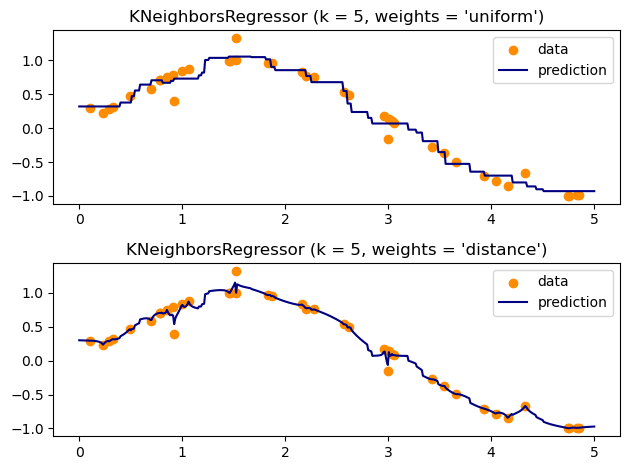

In [45]:
n_neighbors = 5

for i, weights in enumerate(params):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X_train, y).predict(X_test)

    plt.subplot(2, 1, i+1)
    plt.scatter(X_train, y, color="darkorange", label="data")
    plt.plot(X_test, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

In [46]:
n_neighbors_list = [1, 3, 5, 10, 15, 20, 30]

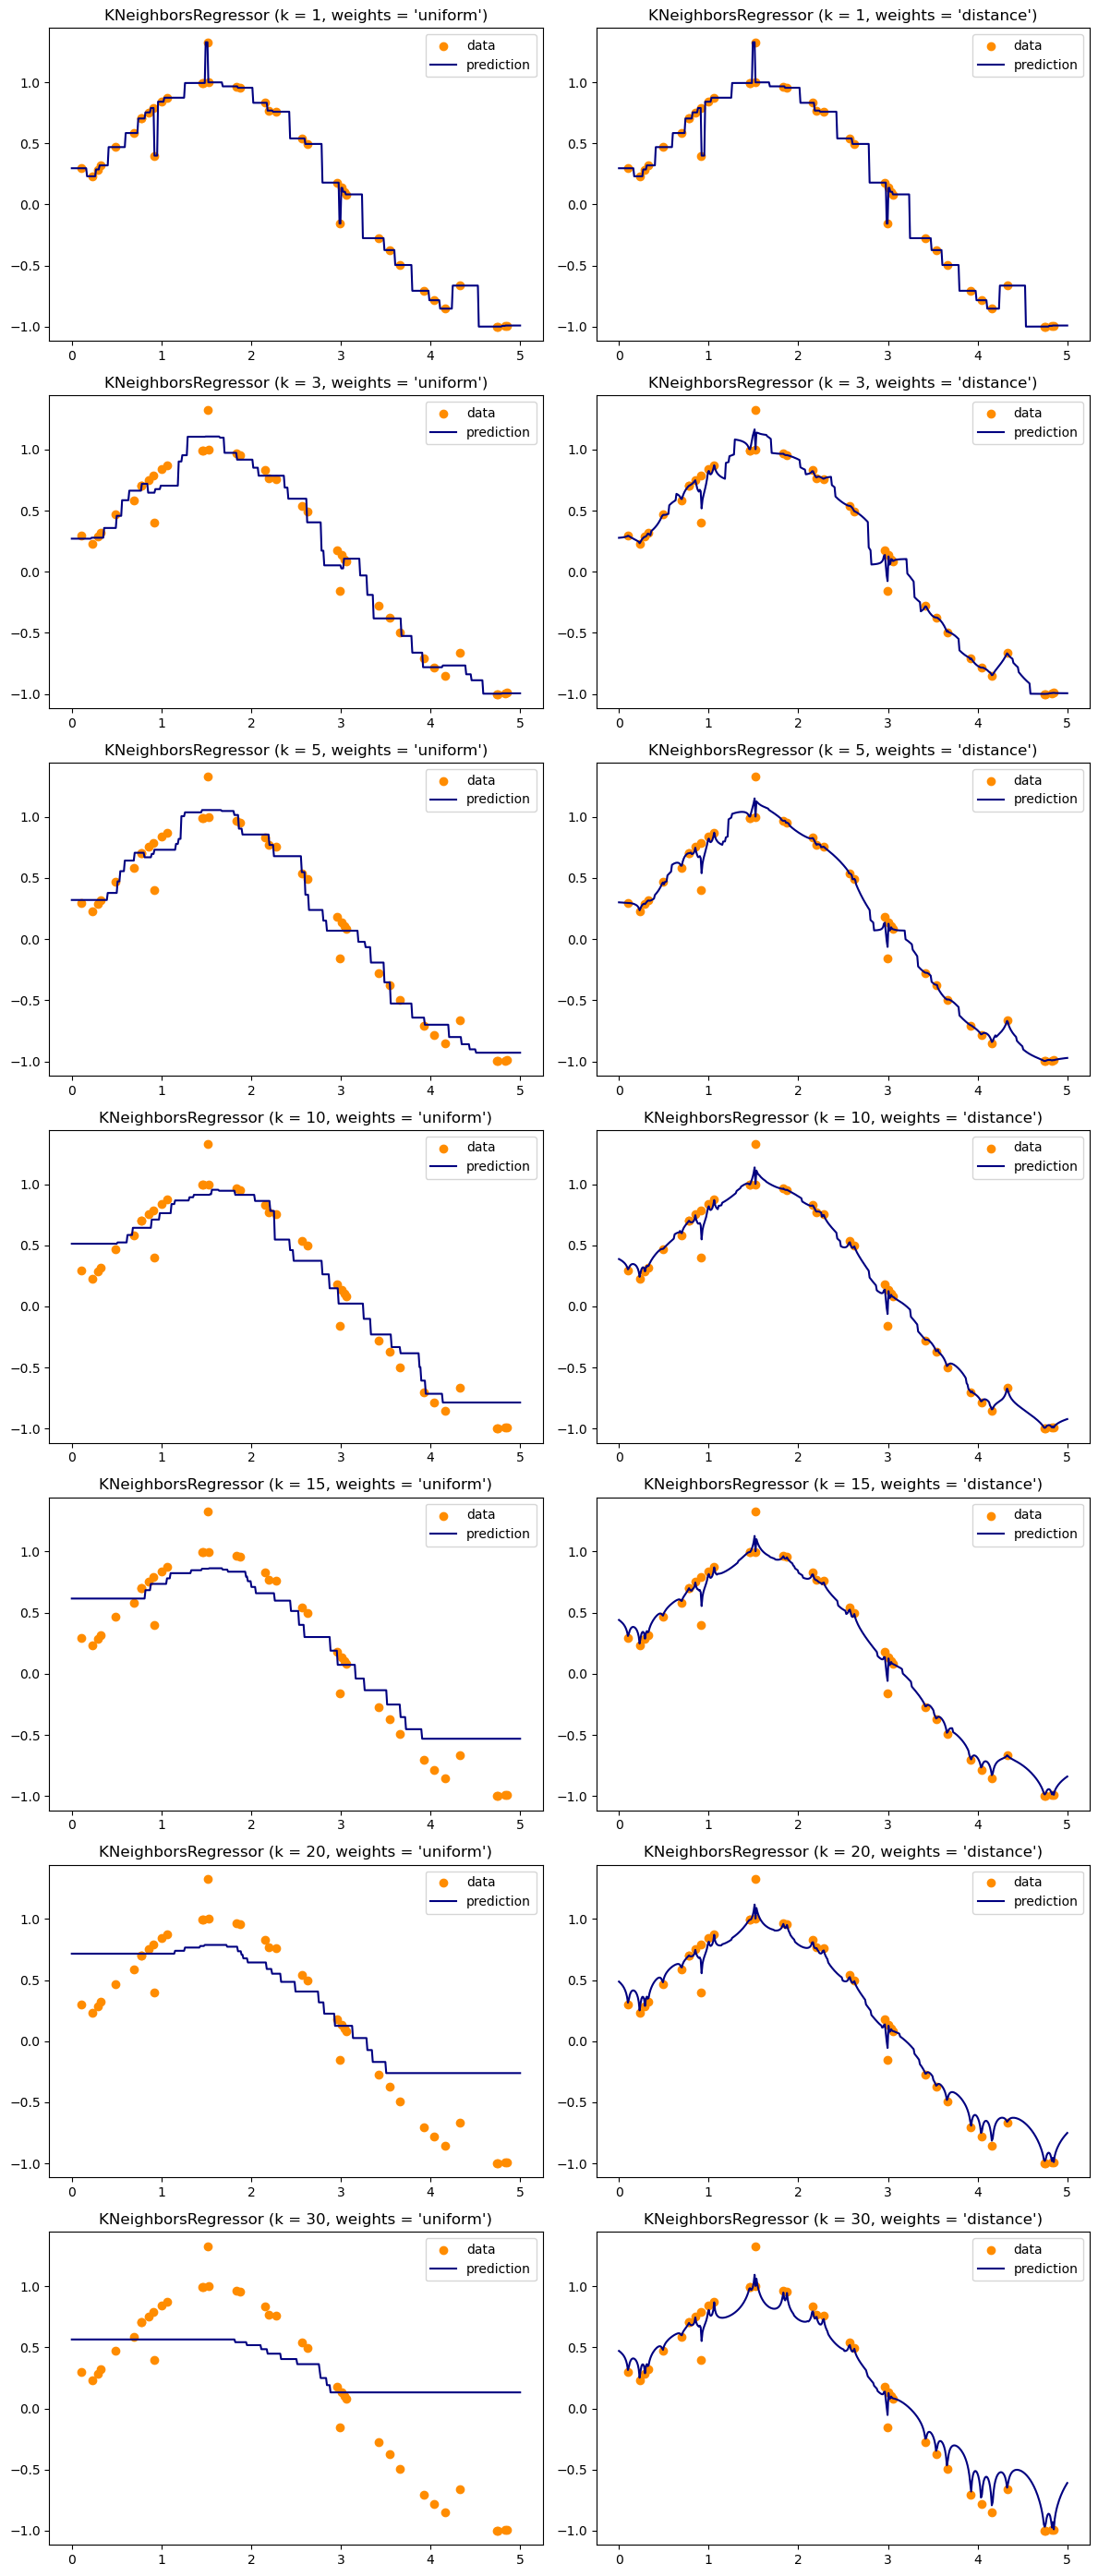

In [47]:
plt.figure(figsize=(12, 4*len(n_neighbors_list)))

for i, k in enumerate(n_neighbors_list):
    for j, weights in enumerate(params):
        knn = neighbors.KNeighborsRegressor(k, weights=weights)
        y_ = knn.fit(X_train, y).predict(X_test)

        plt.subplot(len(n_neighbors_list), 2, i*2 + j + 1)
        plt.scatter(X_train, y, color="darkorange", label="data")
        plt.plot(X_test, y_, color="navy", label="prediction")
        plt.axis("tight")
        plt.legend()
        plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (k, weights))

plt.tight_layout()